In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(f"Train shape: {train.shape}")
print(f"Train shape: {test.shape}")

Train shape: (42000, 785)
Train shape: (28000, 784)


In [8]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [9]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
print(f"Train shape: {x_train.shape}")
print(f"Train shape: {x_test.shape}")

Train shape: (60000, 28, 28)
Train shape: (10000, 28, 28)


In [12]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [13]:
print(f"Train shape: {x_train.shape}")
print(f"Train shape: {x_test.shape}")

Train shape: (60000, 28, 28, 1)
Train shape: (10000, 28, 28, 1)


In [14]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size = 3, padding="same", activation = 'relu',kernel_initializer="he_normal")
model1 = tf.keras.Sequential(
    [
        DefaultConv2D(filters=64, kernel_size=7,input_shape=(28, 28, 1)),
        layers.MaxPool2D(),
        DefaultConv2D(filters=128),
        DefaultConv2D(filters=128),
        layers.MaxPool2D(),        
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
        layers.Dropout(0.5),
        layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model1.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

score1 = model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score1[0])
print("Test accuracy:", score1[1])

Epoch 1/15
422/422 [==============================] - 23s 18ms/step - loss: 0.9322 - accuracy: 0.6754 - val_loss: 0.0791 - val_accuracy: 0.9810
Epoch 2/15
422/422 [==============================] - 7s 16ms/step - loss: 0.3035 - accuracy: 0.9095 - val_loss: 0.0438 - val_accuracy: 0.9877
Epoch 3/15
422/422 [==============================] - 7s 16ms/step - loss: 0.1929 - accuracy: 0.9451 - val_loss: 0.0519 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 7s 16ms/step - loss: 0.1570 - accuracy: 0.9545 - val_loss: 0.0517 - val_accuracy: 0.9875
Epoch 5/15
422/422 [==============================] - 7s 16ms/step - loss: 0.1347 - accuracy: 0.9598 - val_loss: 0.0385 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 7s 16ms/step - loss: 0.1144 - accuracy: 0.9666 - val_loss: 0.0382 - val_accuracy: 0.9920
Epoch 7/15
422/422 [==============================] - 7s 17ms/step - loss: 0.1033 - accuracy: 0.9708 - val_loss: 0.0387 - val_accuracy: 0.991

In [15]:
score1 = model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score1[0])
print("Test accuracy:", score1[1])

Test loss: 0.03791018947958946
Test accuracy: 0.9918000102043152


In [16]:
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)



In [17]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [18]:
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 4s 5ms/step - loss: 0.3635 - accuracy: 0.8901 - val_loss: 0.0828 - val_accuracy: 0.9757
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1109 - accuracy: 0.9659 - val_loss: 0.0594 - val_accuracy: 0.9833
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0824 - accuracy: 0.9744 - val_loss: 0.0468 - val_accuracy: 0.9880
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0700 - accuracy: 0.9786 - val_loss: 0.0439 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0603 - accuracy: 0.9812 - val_loss: 0.0425 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0378 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0342 - val_accuracy: 0.9902
Epoch 

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.025714989751577377
Test accuracy: 0.9911999702453613


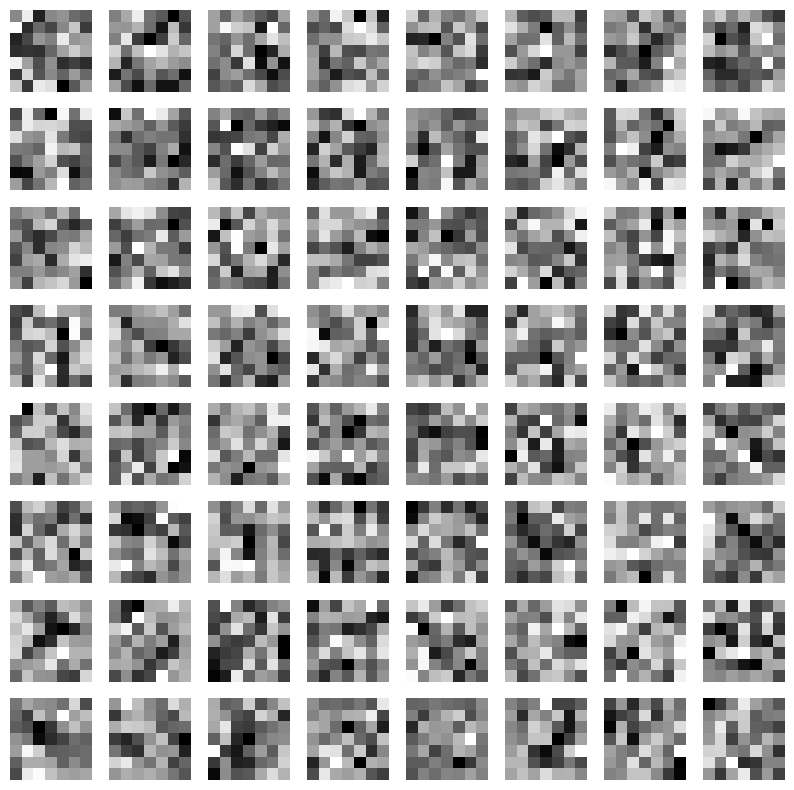

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Get the weights of the first convolutional layer
weights = model1.layers[0].get_weights()[0]

# Plot the filters as images
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(10,10))
for i in range(8):
    for j in range(8):
        # Compute the index of the filter to visualize
        filter_index = i*8 + j
        
        # Check if the index is within the bounds of the weights tensor
        if filter_index < weights.shape[3]:
            axs[i,j].imshow(weights[:,:,0,filter_index], cmap='gray')
        axs[i,j].axis('off')
plt.show()


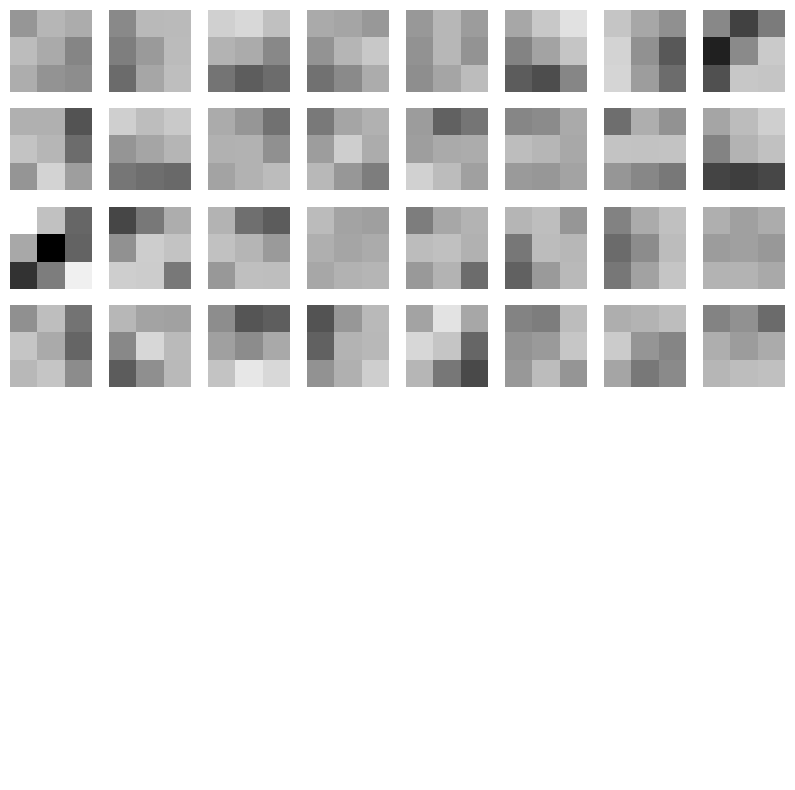

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get the weights of the first convolutional layer
weights = model.layers[0].get_weights()[0]

# Normalize the weights so that the minimum value is 0 and the maximum value is 1
weights = (weights - np.min(weights)) / (np.max(weights) - np.min(weights))

# Scale the weights up to the range 0-255 to obtain grayscale pixel values
weights *= 255

# Plot the filters as images
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(10,10))
for i in range(8):
    for j in range(8):
        # Compute the index of the filter to visualize
        filter_index = i*8 + j
        
        # Check if the index is within the bounds of the weights tensor
        if filter_index < weights.shape[3]:
            axs[i,j].imshow(weights[:,:,0,filter_index], cmap='gray', vmin=0, vmax=255)
        axs[i,j].axis('off')
plt.show()


Epoch 1/30
422/422 [==============================] - 7s 17ms/step - loss: 0.0164 - accuracy: 0.9951 - val_loss: 0.0538 - val_accuracy: 0.9935
Epoch 2/30
422/422 [==============================] - 7s 16ms/step - loss: 0.0221 - accuracy: 0.9943 - val_loss: 0.0582 - val_accuracy: 0.9932
Epoch 3/30
422/422 [==============================] - 7s 17ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.0498 - val_accuracy: 0.9933
Epoch 4/30
422/422 [==============================] - 7s 17ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0614 - val_accuracy: 0.9925
Epoch 5/30
422/422 [==============================] - 7s 17ms/step - loss: 0.0212 - accuracy: 0.9941 - val_loss: 0.0565 - val_accuracy: 0.9928
Epoch 6/30
422/422 [==============================] - 7s 16ms/step - loss: 0.0195 - accuracy: 0.9949 - val_loss: 0.0622 - val_accuracy: 0.9937
Epoch 7/30
422/422 [==============================] - 7s 17ms/step - loss: 0.0169 - accuracy: 0.9955 - val_loss: 0.0577 - val_accuracy: 0.9945

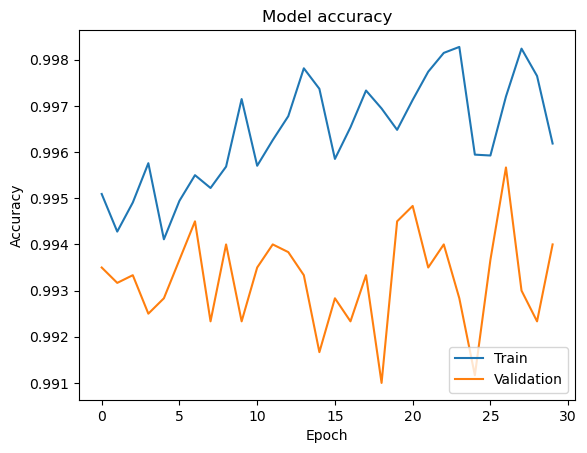

In [31]:
import matplotlib.pyplot as plt
import numpy as np

history = model1.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.1)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [35]:
import cv2
# Load an image to predict (replace with your own image)
img = cv2.imread('/kaggle/input/image6/the-number-six-as-a-polished-golden-object-FECPMC.jpg', cv2.IMREAD_GRAYSCALE)

# Preprocess the image for prediction
img = cv2.resize(img, (28, 28))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=-1)
img = np.expand_dims(img, axis=0)

# Make a prediction on the image
pred = model.predict(img)

# Get the predicted class label
class_label = np.argmax(pred)

# Print the predicted class label
print('Predicted class:', class_label)


1/1 [==============================] - 0s 114ms/step
Predicted class: 6


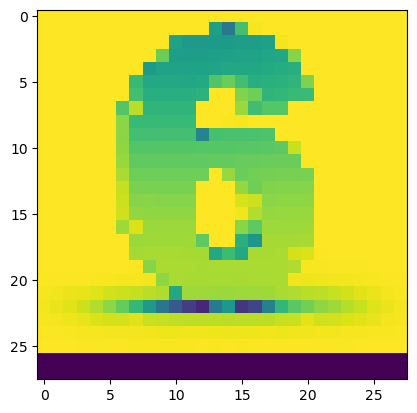

In [64]:
plt.imshow(img.reshape(28, 28))

In [52]:
# import cv2
# import numpy as np
# from sklearn.cluster import KMeans

# # Load image
# img = cv2.imread("/kaggle/input/multiple/download.jpeg")

# # Convert to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Threshold to create a binary image
# _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# # Find contours
# contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Get bounding rectangles of contours
# rectangles = [cv2.boundingRect(contour) for contour in contours]

# # Crop and save each rectangle
# for i, rectangle in enumerate(rectangles):
#     x, y, w, h = rectangle
#     roi = img[y:y+h, x:x+w]
#     cv2.imwrite("roi_{}.jpg".format(i), roi)

# # Use KMeans clustering to group bounding rectangles into rows
# X = np.array(rectangles)
# kmeans = KMeans(n_clusters=2)
# kmeans.fit(X[:,1].reshape(-1,1))
# labels = kmeans.labels_

# # Get bounding rectangles for each row
# row_rectangles = []
# for i in range(2):
#     indices = np.where(labels == i)[0]
#     row_rectangles.append(cv2.boundingRect(np.concatenate([contours[index] for index in indices])))

# # Sort rows from top to bottom
# row_rectangles = sorted(row_rectangles, key=lambda x:x[1])

# # Crop and save each row
# for i, row_rectangle in enumerate(row_rectangles):
#     x, y, w, h = row_rectangle
#     roi = img[y:y+h, x:x+w]
#     cv2.imwrite("row_{}.jpg".format(i), roi)
